# 1.1 수학과 파이썬 복습

In [1]:
import numpy as np

In [2]:
x = np.array([1, 2, 3])
x.__class__

numpy.ndarray

In [3]:
x.shape

(3,)

In [4]:
x.ndim

1

In [5]:
W = np.array([[1, 2, 3],
            [4, 5, 6]])
W.shape

(2, 3)

In [6]:
W.ndim

2

In [7]:
W = np.array([[1,2,3], [4,5,6]])
X = np.array([[0,1,2], [3,4,5]])
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [8]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

In [9]:
A = np.array([[1,2], [3,4]])
A * 10 #broadcast

array([[10, 20],
       [30, 40]])

In [10]:
A = np.array([[1,2], [3,4]])
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

In [11]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [12]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

# 1.2 신경망 추론

In [13]:
import numpy as np
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
x = np.random.randn(10,2)
h = np.matmul(x,W1) + b1

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [15]:
a = sigmoid(h)

In [16]:
x = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

In [17]:
class Sigmoid:
    def __init__(self):
        self.params = []
    def forward(self, x):
        return 1/(1+np.exp(-x))

In [18]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

In [19]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [20]:
a = ['A', 'B']
a += ['C', 'D']
a

['A', 'B', 'C', 'D']

In [21]:
x = np.random.rand(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)

# 1.3 신경망의 학습

In [22]:
D,N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis = 0)
dy = np.random.randn(N,D)
dx = np.sum(dy, axis = 0, keepdims = True)

In [23]:
D,N = 8,7
x = np.random.randn(N,D)
y = np.sum(x, axis = 0, keepdims = True)

dy = np.random.randn(1,D)
dx = np.repeat(dy, D, axis = 0)

In [24]:
class MatMUl:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
    
    def forward(self, x):
        W, = self.parms
        out = np.matmul(x, W)
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW
        return dx
    

In [25]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1/(1+np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1-self.out) * self.out
        return dx

In [26]:
class Affine:
    def __init__(self, W, b):
        self.params = [W,b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x,W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W,b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis = 0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = dx
        return dx

In [27]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr *grads[i]

In [28]:
'''
model = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...)
    loss = model.forward(x_batch, t_batch)
    model.backward()
    optimizer.update(model.params, model.grads)
    ...
'''

'\nmodel = TwoLayerNet(...)\noptimizer = SGD()\n\nfor i in range(10000):\n    ...\n    x_batch, t_batch = get_mini_batch(...)\n    loss = model.forward(x_batch, t_batch)\n    model.backward()\n    optimizer.update(model.params, model.grads)\n    ...\n'

# 1.4 신경망으로 문제를 풀다

In [29]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt

x,t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


In [30]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = 0.01 * np.random.randn(I,H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H,O)
        b2 = np.zeros(O)
        
        self.layers =[
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout = 1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [31]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr=learning_rate)

data_size = len(x)

max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count +=1
        
        if (iters+1)%10 == 0:
            avg_loss = total_loss / loss_count
            print('|epoch %d | repeat %d / %d | loss %.2f'
                 % (epoch +1, iters +1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

|epoch 1 | repeat 10 / 10 | loss 1.13
|epoch 2 | repeat 10 / 10 | loss 1.13
|epoch 3 | repeat 10 / 10 | loss 1.12
|epoch 4 | repeat 10 / 10 | loss 1.12
|epoch 5 | repeat 10 / 10 | loss 1.11
|epoch 6 | repeat 10 / 10 | loss 1.14
|epoch 7 | repeat 10 / 10 | loss 1.16
|epoch 8 | repeat 10 / 10 | loss 1.11
|epoch 9 | repeat 10 / 10 | loss 1.12
|epoch 10 | repeat 10 / 10 | loss 1.13
|epoch 11 | repeat 10 / 10 | loss 1.12
|epoch 12 | repeat 10 / 10 | loss 1.11
|epoch 13 | repeat 10 / 10 | loss 1.09
|epoch 14 | repeat 10 / 10 | loss 1.08
|epoch 15 | repeat 10 / 10 | loss 1.04
|epoch 16 | repeat 10 / 10 | loss 1.03
|epoch 17 | repeat 10 / 10 | loss 0.96
|epoch 18 | repeat 10 / 10 | loss 0.92
|epoch 19 | repeat 10 / 10 | loss 0.92
|epoch 20 | repeat 10 / 10 | loss 0.87
|epoch 21 | repeat 10 / 10 | loss 0.85
|epoch 22 | repeat 10 / 10 | loss 0.82
|epoch 23 | repeat 10 / 10 | loss 0.79
|epoch 24 | repeat 10 / 10 | loss 0.78
|epoch 25 | repeat 10 / 10 | loss 0.82
|epoch 26 | repeat 10 / 10 | loss 

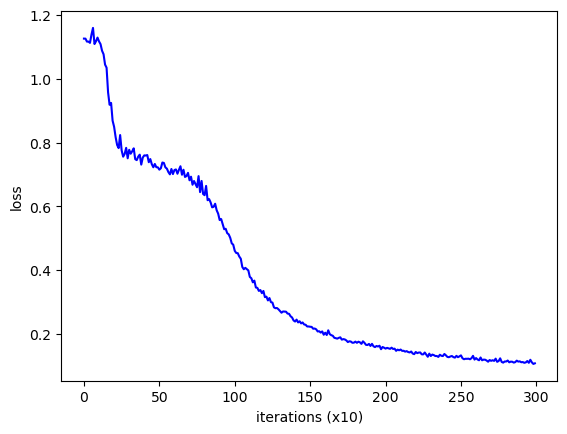

In [32]:
plt.plot(range(max_epoch),loss_list, 'b')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 2.64
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 2.56
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.63
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.38
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.41
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 2.24
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.51
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.77
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.52
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.39
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.57
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.37
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.25
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.25
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.34
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 2.04
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 1.54
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 1.69
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 2.02
| epoch 2

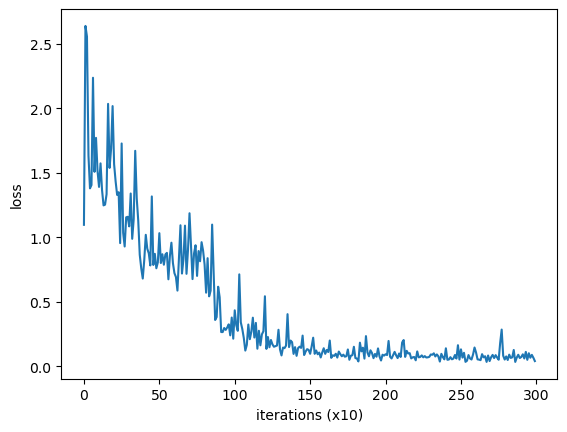

In [33]:
from common.trainer import Trainer

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 10.
x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

# 1.5 계산 고속화

In [34]:
a = np.random.randn(3)
a.dtype

dtype('float64')

In [35]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [36]:
c = np. random.randn(3).astype('f')
c.dtype

dtype('float32')

In [37]:
'''
import cupy as cp
x = cp.arrange(6).reshape(2,3).astype('f')
print(x, x.sum(axis=1))
'''

"\nimport cupy as cp\nx = cp.arrange(6).reshape(2,3).astype('f')\nprint(x, x.sum(axis=1))\n"